(8, 95, 1)

Estadísticas de los canales:
            Media  Desviación estándar  Coeficiente de variación
Canal 1  1.383869             1.530833                  1.106197
Canal 2 -0.263531             1.160428                 -4.403379
Canal 3  1.267889             1.555152                  1.226568
Canal 4  1.737853             1.715777                  0.987297
Canal 5  0.057730             1.618121                 28.029282
Canal 6  0.147500             1.302639                  8.831480
Canal 7 -0.847449             1.333678                 -1.573756
Canal 8  0.021343             1.731672                 81.136366
None


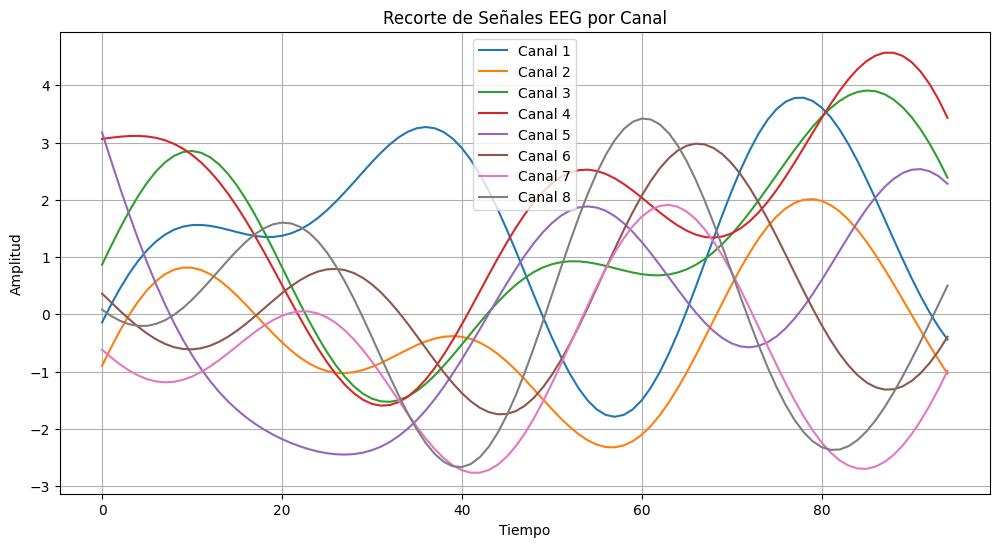

None


In [3]:
%matplotlib inline
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

class EEGSignal:
    def __init__(self, file_path):
        self.data = loadmat (file_path)['data']
        self.original_data = self.data.copy()
        self.canales, self.tiempo, self.epochs = self.data.shape
        self.recorte = None
        self.unificado = None
        
        self._tamaño_señal = self.data.size
        self._dimensiones_señal = self.data.shape
        
        
        self._tamaño_recorte = None
        self._dimensiones_recorte = None
    
    def recortar(self, epoca_inicio: int, epoca_fin: int):
        self.recorte = self.data[:,5:100, epoca_inicio:epoca_fin]
        self._dimensiones_recorte = self.recorte.shape
        self._tamaño_recorte = self.recorte.size
        #return self.recorte
    
    def recuperar_señal_original(self):
        return self.original_data
    
    def unificar_epocas_del_recorte(self):
        canales, tiempo, epocas = self.recorte.shape
        self.unificado = self.recorte.reshape(canales, tiempo * epocas)
        return self.unificado
    
    def get_tamaño_dimensiones(self):
        print(f"""
              Original:
              Dimensiones: {self._dimensiones_señal}
              Tamaño: {self._tamaño_señal}
              
              Recorte:
              Dimensiones: {self._dimensiones_recorte}
              Tamaño: {self._tamaño_recorte}""")
    
    def calcular_estadisticas(self):
        #Calcular estadísticas
        media = np.mean(self.unificado, axis=1)
        desviacion_std = np.std(self.unificado, axis=1)
        cv = desviacion_std / media
        
        #Creación del DataFrame
        df_estadisticas = pd.DataFrame({
            'Media': media,
            'Desviación estándar': desviacion_std,
            'Coeficiente de variación': cv
        })
        
        # Asignar los números de los canales como índice
        df_estadisticas.index = [f"Canal {i+1}" for i in range(len(media))]
        
        # Imprimir el DataFrame
        print("\nEstadísticas de los canales:")
        print(df_estadisticas.to_string())  # Esto asegura que los nombres de las columnas se muestren

    def graficar_recorte(self):
        # Crear el gráfico
        plt.figure(figsize=(12, 6))
        
        # Obtener el número de canales
        num_canales = self.recorte.shape[0]
        tiempo = np.arange(self.recorte.shape[1])  # Eje de tiempo

        # Graficar cada canal
        for i in range(num_canales):
            plt.plot(tiempo, self.recorte[i, :, 0], label=f'Canal {i + 1}')  # Usamos la primera época
        
        plt.title("Recorte de Señales EEG por Canal")
        plt.xlabel("Tiempo")
        plt.ylabel("Amplitud")
        plt.legend()
        plt.grid()
        plt.show()
        
        
    
data = sio.loadmat('S1.mat')['data']


señal1 = EEGSignal('S1.mat')
señal2 = EEGSignal('S2.mat')
señal3 = EEGSignal('S3.mat')
señal1.recortar(4,5)
señal1.unificar_epocas_del_recorte()
señal2.recortar(4,80)
señal3.recortar(70,100)
#print(señal1.get_tamaño_dimensiones())
#print(señal2.get_tamaño_dimensiones())
#print(señal3.get_tamaño_dimensiones())
print(señal1.recorte.shape)
print(señal1.calcular_estadisticas())
print(señal1.graficar_recorte())
    


